<h1 style="font-size:2rem;color:Blue;"> <center>Quizz Game using vocal command<br>

In [1]:
import librosa
import numpy as np
import os
import IPython.display as ipd

In [159]:
# Define a list to store the labels
labels = []
mfcc_features = []

# Iterate over all subfolders in the "data" folder
for subfolder in os.listdir("data"):
    subfolder_path = os.path.join("data", subfolder)
    # Iterate over all audio files in the current subfolder
    for file in os.listdir(subfolder_path):
        # Load audio file
        y, sr = librosa.load(os.path.join(subfolder_path, file))
        # Extract MFCC features
        mfcc = librosa.feature.mfcc(y=y, sr=sr,)
        
        # Flatten the 2D MFCC array into a 1D array
        mfcc_flat = mfcc.flatten()
        # mean of mfcc
        mean_mfcc = mfcc_flat.mean()
        # Append the MFCC features to the list
        mfcc_features.append(mean_mfcc)
        # Append the label to the list
        labels.append(subfolder)
        
        print(f'subfolder : {subfolder}  mean_mfcc : {mfcc_flat}')

subfolder : deux  mean_mfcc : [-5.84875793e+02 -5.83594910e+02 -5.67813416e+02 -5.30513245e+02
 -5.22261963e+02 -5.29140869e+02 -5.34053528e+02 -4.57715515e+02
 -3.62088165e+02 -3.22482056e+02 -3.09358612e+02 -3.11727142e+02
 -3.30583557e+02 -3.60637085e+02 -4.00131714e+02 -4.54577179e+02
 -5.15986694e+02 -5.46605713e+02 -5.78336853e+02 -5.84875793e+02
 -5.84875793e+02 -5.84875793e+02 -5.84875793e+02 -5.84875793e+02
  0.00000000e+00 -9.53116059e-01 -4.30266201e-01  6.67625427e+01
  8.51799850e+01  7.52190399e+01  6.79132996e+01  9.62140350e+01
  9.84859390e+01  1.03467339e+02  9.96125946e+01  1.05136620e+02
  1.02679588e+02  1.03324974e+02  1.13306862e+02  1.12702011e+02
  8.38725281e+01  4.85175934e+01  8.90997410e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.74850547e-01  3.06744027e+00  6.20923500e+01
  7.56977539e+01  6.52652512e+01  5.70984688e+01  5.06915970e+01
 -2.18497968e+00 -4.83902435e+01 -7.50182571e+01 -6.67683334

subfolder : non  mean_mfcc : [-1131.3708     0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.    ]
subfolder : non  mean_mfcc : [-1131.3708     0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.    ]
subfolder : non  mean_mfcc : [-1131.3708     0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.    ]
subfolder : non  mean_mfcc : [-1131.3708     0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.    ]
subfolder : non  mean_mfcc : [-1

subfolder : quatre  mean_mfcc : [-6.26696655e+02 -6.22985535e+02 -5.87965515e+02 -5.57356506e+02
 -3.19661926e+02 -2.05994934e+02 -1.83261200e+02 -2.09228836e+02
 -2.21489807e+02 -2.37026520e+02 -2.63511292e+02 -3.38342743e+02
 -4.97745117e+02 -5.88084412e+02 -4.41440735e+02 -3.87652771e+02
 -3.82000183e+02 -3.99301605e+02 -4.27311340e+02 -4.37588593e+02
 -4.56211365e+02 -5.02306213e+02 -5.58657104e+02 -6.05473816e+02
 -6.26696655e+02 -6.26696655e+02 -6.26696655e+02 -6.26696655e+02
 -6.26696655e+02  0.00000000e+00 -2.50458527e+00 -2.82383990e+00
  5.30993080e+00  1.15667938e+02  1.56506851e+02  1.83614105e+02
  1.94927811e+02  2.07725861e+02  2.21946167e+02  2.18332169e+02
  1.91348083e+02  1.03358009e+02  1.92817154e+01  3.84136887e+01
  4.77164536e+01  4.78680077e+01  5.01823654e+01  5.67052078e+01
  6.45628510e+01  6.76141968e+01  6.50485840e+01  4.61840668e+01
  1.74383812e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.778983

subfolder : trois  mean_mfcc : [-1131.3708     0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.    ]
subfolder : trois  mean_mfcc : [-1131.3708     0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.    ]
subfolder : trois  mean_mfcc : [-6.60774292e+02 -6.42218750e+02 -6.00238281e+02 -6.21084717e+02
 -5.02654541e+02 -4.22137390e+02 -4.24227295e+02 -4.33646820e+02
 -4.15016693e+02 -3.53371338e+02 -3.02353180e+02 -2.83779755e+02
 -2.86938354e+02 -2.85592133e+02 -2.86737671e+02 -3.11791229e+02
 -3.88498108e+02 -4.97551239e+02 -5.91691711e+02 -6.27393616e+02
 -6.56107483e+02 -6.60774292e+02 -6.60774292e+02 -6.60774292e+02
 -6.60774292e+02  0.00000000e+00 -6.74863243e+00 -1.33046455e+01
 -9.84051132e+00  2.974908

subfolder : un  mean_mfcc : [-1131.3708     0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.    ]
subfolder : un  mean_mfcc : [-5.9569806e+02 -4.9009241e+02 -2.8828229e+02 -2.0060654e+02
 -1.8422075e+02 -1.8299384e+02 -1.7023708e+02 -1.7563612e+02
 -1.9149348e+02 -2.1341785e+02 -2.3709521e+02 -2.7817709e+02
 -3.4976083e+02 -4.5996216e+02 -5.7343353e+02 -5.9032654e+02
 -5.9111426e+02 -5.9167523e+02 -5.9091571e+02 -5.9044293e+02
 -5.9047205e+02 -5.9130774e+02 -5.8930566e+02  0.0000000e+00
  7.7787910e+01  1.8764690e+02  2.2405542e+02  2.2782718e+02
  2.2240054e+02  2.3775458e+02  2.4546310e+02  2.4976089e+02
  2.5136038e+02  2.4498288e+02  2.2838419e+02  1.9247717e+02
  1.1953004e+02  2.4991669e+01  7.5737848e+00  6.4429007e+00
  5.6766319e+00  6.7488799e+00  7.4113011e+00  7.3745995e+00
  6.1981144e+00  8.4332275e+00  0.0000000e+00 -1.0905274e+01

subfolder : un  mean_mfcc : [-1131.3708     0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.    ]
subfolder : un  mean_mfcc : [-1131.3708     0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.    ]
subfolder : un  mean_mfcc : [-1131.3708     0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.    ]
subfolder : un  mean_mfcc : [-1131.3708     0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.         0.         0.         0.         0.
     0.         0.    ]


-56.568542


In [155]:
from sklearn.model_selection import train_test_split
# Split the dataset into a 70/30 training/test split
X_train, X_test, y_train, y_test = train_test_split(mfcc_features, labels, test_size=0.2, random_state=42)

In [157]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
print(y_train.shape)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
print(X_train.shape)

for i in range(len(y_test)):
    print(X_train[i], y_train[i])

(113,)
(113, 1)
[-17.908611] 5
[-56.568542] 1
[-16.043951] 4
[-56.568542] 1
[-56.568542] 0
[-13.992389] 0
[-56.568542] 5
[-56.568542] 4
[-56.568542] 1
[-15.067934] 5
[-56.568542] 3
[-56.568542] 4
[-56.568542] 2
[-22.097961] 0
[-56.568542] 3
[-56.568542] 1
[-56.568542] 1
[-56.568542] 3
[-56.568542] 1
[-56.568542] 1
[-56.568542] 1
[-56.568542] 3
[-56.568542] 2
[-56.568542] 1
[-56.568542] 0
[-56.568542] 4
[-56.568542] 1
[-56.568542] 0
[-56.568542] 2


In [118]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [119]:
# Make predictions on the test data
y_pred = clf.predict(X_test)
print(f'X_test : {X_test}')
print(f'y_pred : {y_pred}')
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy : {accuracy}')

X_test : [[-56.568542]
 [-56.568542]
 [-56.568542]
 [-19.317135]
 [-56.568542]
 [-56.568542]
 [-56.568542]
 [-56.568542]
 [-56.568542]
 [-56.568542]
 [-56.568542]
 [-56.568542]
 [-18.083681]
 [-56.568542]
 [-56.568542]
 [-56.568542]
 [-56.568542]
 [-56.568542]
 [-56.568542]
 [-24.132986]
 [-19.27499 ]
 [-17.056334]
 [-56.568542]
 [-56.568542]
 [-56.568542]
 [-56.568542]
 [-18.24518 ]
 [-19.075352]
 [-56.568542]]
y_pred : [1 1 1 5 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 5 5 5 1 1 1 1 5 5 1]
accuracy : 0.13793103448275862


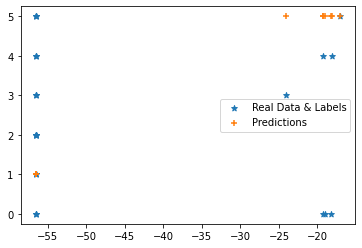

In [149]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test[:], label="Real Data & Labels", marker='*')
plt.scatter(X_test[:, 0], y_pred[:], label="Predictions", marker='+')
plt.legend()
plt.show()

In [121]:
ipd.Audio('data/un/5bd77c5f-0d72-4e55-ba2e-f0153ccec9ef.mp3')